# KC House Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

## Importing train data

In [2]:
df_train = pd.read_csv('train.csv')

## Data Exploration for train data

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
#Listing columns with nulls
df_train.columns[df_train.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Importing and data exploration of test data

In [9]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [14]:
df_test.columns[df_test.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

## Combining train and test data

In [15]:
df = df_train.append(df_test, sort = False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [16]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [17]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

## Data Cleaning

In [18]:
df.dropna(thresh = 1460, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [19]:
df.columns[df.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SalePrice']

In [20]:
cat = df.select_dtypes(include = ['object'])
num = df.select_dtypes(exclude = ['object'])

In [21]:
cat.columns[cat.isnull().any()].tolist()

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [22]:
cat_2 = pd.get_dummies(cat,drop_first = True)

In [23]:
cat['MSZoning'].fillna(cat['MSZoning'].mode()[0], inplace = True)
cat['Utilities'].fillna(cat['Utilities'].mode()[0], inplace = True)
cat['Exterior1st'].fillna(cat['Exterior1st'].mode()[0], inplace = True)
cat['Exterior2nd'].fillna(cat['Exterior2nd'].mode()[0], inplace = True)
cat['MasVnrType'].fillna(cat['MasVnrType'].mode()[0], inplace = True)
cat['BsmtQual'].fillna(cat['BsmtQual'].mode()[0], inplace = True)
cat['BsmtCond'].fillna(cat['BsmtCond'].mode()[0], inplace = True)
cat['BsmtExposure'].fillna(cat['BsmtExposure'].mode()[0], inplace = True)
cat['BsmtFinType1'].fillna(cat['BsmtFinType1'].mode()[0], inplace = True)
cat['BsmtFinType2'].fillna(cat['BsmtFinType2'].mode()[0], inplace = True)
cat['Electrical'].fillna(cat['Electrical'].mode()[0], inplace = True)
cat['KitchenQual'].fillna(cat['KitchenQual'].mode()[0], inplace = True)
cat['Functional'].fillna(cat['Functional'].mode()[0], inplace = True)
cat['GarageType'].fillna(cat['GarageType'].mode()[0], inplace = True)
cat['FireplaceQu'].fillna(cat['FireplaceQu'].mode()[0], inplace = True)
cat['GarageFinish'].fillna(cat['GarageFinish'].mode()[0], inplace = True)
cat['GarageQual'].fillna(cat['GarageQual'].mode()[0], inplace = True)
cat['GarageCond'].fillna(cat['GarageCond'].mode()[0], inplace = True)
cat['SaleType'].fillna(cat['SaleType'].mode()[0], inplace = True)

C:\Users\Kimberly\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [25]:
num.columns[num.isnull().any()].tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [26]:
num['MasVnrArea'].fillna(num['MasVnrArea'].median, inplace = True)
num['BsmtFinSF1'].fillna(num['BsmtFinSF1'].median, inplace = True)
num['BsmtFinSF2'].fillna(num['BsmtFinSF2'].median, inplace = True)
num['BsmtUnfSF'].fillna(num['BsmtUnfSF'].median, inplace = True)
num['TotalBsmtSF'].fillna(num['TotalBsmtSF'].median, inplace = True)
num['GarageArea'].fillna(num['GarageArea'].median, inplace = True)
num['LotFrontage'].fillna(num['LotFrontage'].median, inplace = True)

In [27]:
print (num['BsmtFullBath'].unique())
print (num['BsmtHalfBath'].unique())
print (num['GarageCars'].unique())

[ 1.  0.  2.  3. nan]
[ 0.  1.  2. nan]
[ 2.  3.  1.  0.  4.  5. nan]


In [28]:
num['BsmtFullBath'].fillna(num['BsmtFullBath'].mode()[0], inplace = True)
num['BsmtHalfBath'].fillna(num['BsmtHalfBath'].mode()[0], inplace = True)
num['GarageYrBlt'].fillna(num['GarageYrBlt'].mode()[0], inplace = True)
num['GarageCars'].fillna(num['GarageCars'].mode()[0], inplace = True)

In [29]:
cat['Id'] = df['Id']
df_2 = num.merge(cat, on = 'Id')

C:\Users\Kimberly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_2[['YrSold', 'YearBuilt', 'GarageYrBlt','YearRemodAdd']] = df_2[['YrSold', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd']].astype('category')

## Data Visualization

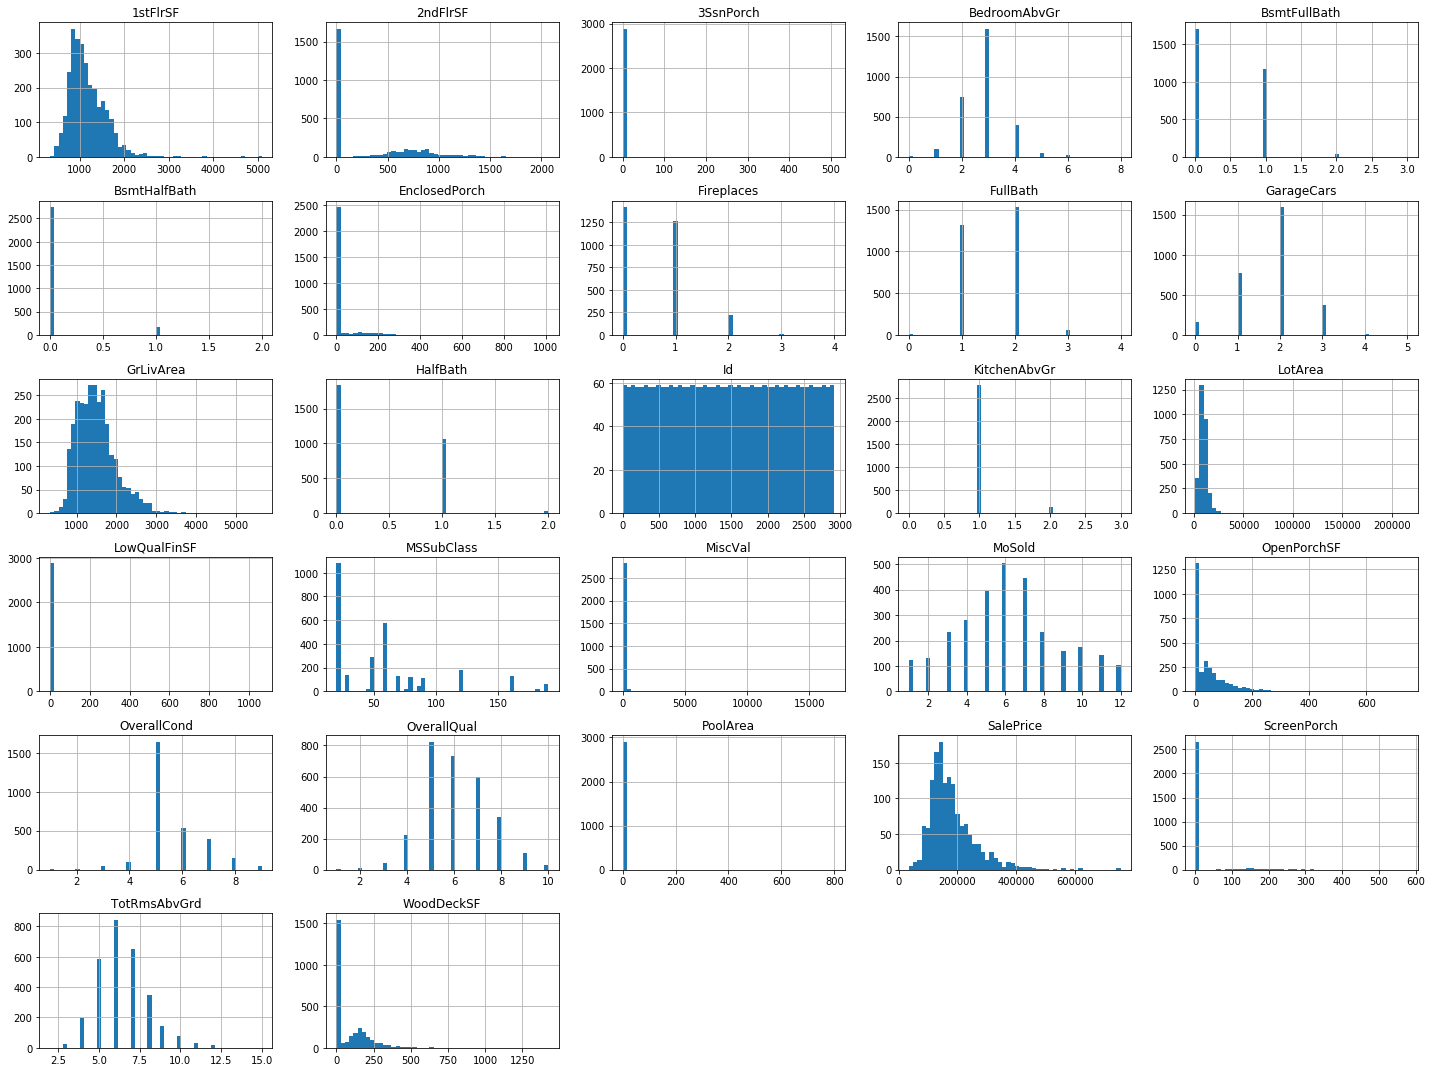

In [31]:
df_2.hist(bins = 50, figsize = (20,15))
plt.tight_layout()
plt.show()

In [32]:
#Checking skewness of numerical attributes
df_2.skew(axis = 0)

Id                0.000000
MSSubClass        1.376165
LotArea          12.829025
OverallQual       0.197212
OverallCond       0.570605
YearBuilt        -0.600114
YearRemodAdd     -0.451252
1stFlrSF          1.470360
2ndFlrSF          0.862118
LowQualFinSF     12.094977
GrLivArea         1.270010
BsmtFullBath      0.625153
BsmtHalfBath      3.933616
FullBath          0.167692
HalfBath          0.694924
BedroomAbvGr      0.326492
KitchenAbvGr      4.304467
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
GarageYrBlt      -0.468752
GarageCars       -0.218705
WoodDeckSF        1.843380
OpenPorchSF       2.536417
EnclosedPorch     4.005950
3SsnPorch        11.381914
ScreenPorch       3.948723
PoolArea         16.907017
MiscVal          21.958480
MoSold            0.195985
YrSold            0.132467
SalePrice         1.882876
dtype: float64

In [33]:
df_2.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,1.000000,0.008931,-0.040746,-0.029771,-0.002839,-0.008678,-0.022252,-0.037816,-0.029046,-0.000318,...,-0.010066,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.021917
MSSubClass,0.008931,1.000000,-0.201730,0.033638,-0.065625,-0.248641,0.309309,0.026482,0.071677,0.010436,...,-0.046564,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.084284
LotArea,-0.040746,-0.201730,1.000000,0.100541,-0.035617,0.332460,0.031515,0.000554,0.284519,0.126671,...,0.180415,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,0.263843
OverallQual,-0.029771,0.033638,0.100541,1.000000,-0.093847,0.479152,0.245596,-0.048393,0.575126,0.165060,...,0.600591,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,0.790982
OverallCond,-0.002839,-0.065625,-0.035617,-0.093847,1.000000,-0.157418,0.005494,0.009048,-0.116569,-0.042823,...,-0.181739,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,-0.077856
1stFlrSF,-0.008678,-0.248641,0.332460,0.479152,-0.157418,1.000000,-0.249823,-0.012704,0.562538,0.257950,...,0.440452,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143,0.605852
2ndFlrSF,-0.022252,0.309309,0.031515,0.245596,0.005494,-0.249823,1.000000,0.017803,0.655085,-0.160956,...,0.182532,0.089922,0.185387,0.054645,-0.032458,0.011070,0.044503,-0.005299,0.014185,0.319334
LowQualFinSF,-0.037816,0.026482,0.000554,-0.048393,0.009048,-0.012704,0.017803,1.000000,0.096916,-0.047031,...,-0.067345,-0.015622,-0.000692,0.087212,-0.004545,0.006835,0.035177,-0.005973,0.011528,-0.025606
GrLivArea,-0.029046,0.071677,0.284519,0.575126,-0.116569,0.562538,0.655085,0.096916,1.000000,0.059333,...,0.489958,0.251017,0.341907,0.003274,0.006268,0.086284,0.135441,0.067118,0.044198,0.708624
BsmtFullBath,-0.000318,0.010436,0.126671,0.165060,-0.042823,0.257950,-0.160956,-0.047031,0.059333,1.000000,...,0.161731,0.186445,0.079767,-0.068172,0.027429,0.053265,0.043996,-0.004578,-0.003419,0.227122


In [34]:
int_float = df_2.select_dtypes(['int64', 'float64'])

<function matplotlib.pyplot.show(*args, **kw)>

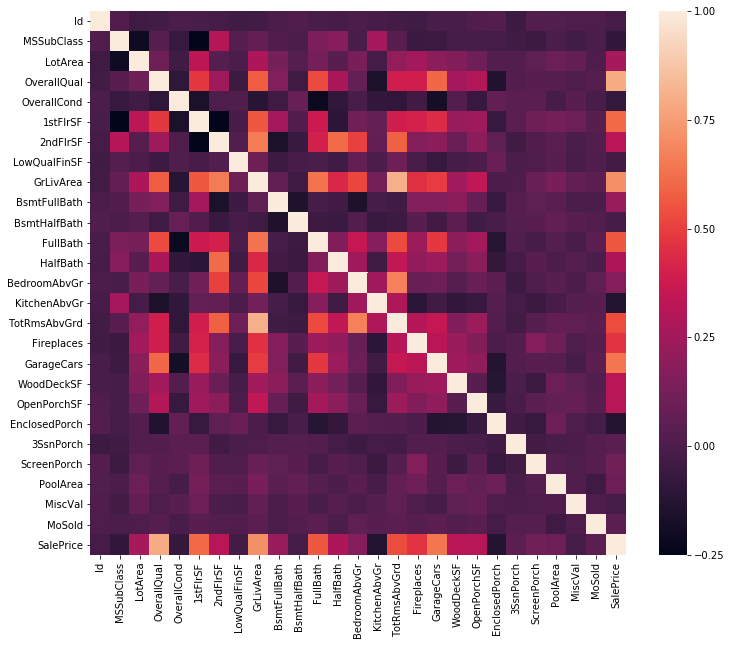

In [35]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_2.corr(),annot = False)
plt.show

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 77 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null category
YearRemodAdd     2919 non-null category
MasVnrArea       2919 non-null object
BsmtFinSF1       2919 non-null object
BsmtFinSF2       2919 non-null object
BsmtUnfSF        2919 non-null object
TotalBsmtSF      2919 non-null object
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
LowQualFinSF     2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-

In [37]:
from scipy.stats import skew
num_2 = df_2._get_numeric_data().columns

In [38]:
skewness = df_2[num_2].apply(lambda x: skew(x.astype('float64')))

skew_attributes = skewness[skewness > 5]

sk = skew_attributes.index
sk

Index(['LotArea', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], dtype='object')

In [39]:
df_2[sk] = np.log1p(df_2[sk])

In [40]:
#List of top 15 attributes with high correlations to SalePrice
corr = df_2.corr().nlargest(n = 15, columns = 'SalePrice')['SalePrice'].index
corr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'BsmtFullBath', 'BedroomAbvGr'],
      dtype='object')

In [55]:
df_corr = df_2[corr]
df_corr['Id'] = df_2['Id']
df_corr.head()

C:\Users\Kimberly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SalePrice,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,BsmtFullBath,BedroomAbvGr,Id
0,208500.0,7,1710,2.0,856,2,8,0,9.042040,0,854,61,1,1.0,3,1
1,181500.0,6,1262,2.0,1262,2,6,1,9.169623,298,0,0,0,0.0,3,2
2,223500.0,7,1786,2.0,920,2,6,1,9.328212,0,866,42,1,1.0,3,3
3,140000.0,7,1717,3.0,961,1,7,1,9.164401,0,756,35,0,1.0,3,4
4,250000.0,8,2198,3.0,1145,2,9,1,9.565284,192,1053,84,1,1.0,4,5


In [56]:
y = df_corr['SalePrice']
x = df_corr.drop('SalePrice', axis = 1)

In [57]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 16 columns):
SalePrice       1460 non-null float64
OverallQual     2919 non-null int64
GrLivArea       2919 non-null int64
GarageCars      2919 non-null float64
1stFlrSF        2919 non-null int64
FullBath        2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
Fireplaces      2919 non-null int64
LotArea         2919 non-null float64
WoodDeckSF      2919 non-null int64
2ndFlrSF        2919 non-null int64
OpenPorchSF     2919 non-null int64
HalfBath        2919 non-null int64
BsmtFullBath    2919 non-null float64
BedroomAbvGr    2919 non-null int64
Id              2919 non-null int64
dtypes: float64(4), int64(12)
memory usage: 467.7 KB


In [58]:
X = pd.get_dummies(x, drop_first = True)

In [59]:
y_2 = y.iloc[:1460]
y_2.tail()

1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, dtype: float64

In [60]:
X_2 = X.iloc[:1460]
X_2.tail()

,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,BsmtFullBath,BedroomAbvGr,Id
1455,6,1647,2.0,953,2,7,1,8.976894,0,694,40,1,0.0,3,1456
1456,6,2073,2.0,2073,2,7,2,9.486152,349,0,0,0,1.0,3,1457
1457,7,2340,1.0,1188,2,9,2,9.109746,0,1152,60,0,0.0,4,1458
1458,5,1078,1.0,1078,1,5,0,9.181735,366,0,0,0,1.0,2,1459
1459,5,1256,1.0,1256,1,6,0,9.204121,736,0,68,1,1.0,3,1460


In [61]:
Test = X.iloc[1460:]
Test.head()

,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,BsmtFullBath,BedroomAbvGr,Id
1460,5,896,1.0,896,1,5,0,9.360741,140,0,0,0,0.0,2,1461
1461,6,1329,1.0,1329,1,6,0,9.565775,393,0,36,1,0.0,3,1462
1462,5,1629,2.0,928,2,6,1,9.534668,212,701,34,1,0.0,3,1463
1463,6,1604,2.0,926,2,7,1,9.208238,360,678,36,1,0.0,3,1464
1464,8,1280,2.0,1280,2,5,0,8.518392,0,0,82,0,0.0,2,1465


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.1, random_state = 10) 

In [64]:
#setting variables to corresponding regression tests
reg = LinearRegression()
R = Ridge()
L = Lasso()
EN = ElasticNet(l1_ratio = 0.8)
ETR = ExtraTreeRegressor()
GBR = GradientBoostingRegressor()

In [65]:
#function to calculate MSE and R2 for each regression method
algorithms = [reg, R, L, EN, ETR, GBR]
reg_type = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'ETR', 'GBR']

def regression():
    MSE = []
    R2 = []
    y_pred = []
    for i in range(len(algorithms)):
        y_pred = (algorithms[i].fit(X_train, y_train).predict(X_test))
        MSE.append((mean_squared_error(y_test, y_pred))**0.5)
        R2.append(r2_score(y_test, y_pred)) 
        
    metrics = pd.DataFrame(columns = ['MSE', 'R2'], index = reg_type)
    metrics['MSE'] = MSE
    metrics['R2'] = R2  
    return metrics

regression()

C:\Users\Kimberly\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kimberly\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,MSE,R2
Linear,30839.532413,0.824163
Ridge,30839.333712,0.824166
Lasso,30839.749621,0.824161
ElasticNet,31212.058330,0.819890
ETR,37107.489902,0.745424
GBR,26616.616513,0.869022


In [67]:
y_Test = GBR.predict(Test)
y_Test

array([118791.01615411, 160488.46672884, 171505.13041769, ...,
       155780.28030463, 112196.33435878, 238801.08483412])

In [69]:
Test['SalePrice'] = y_Test
Test.head()

C:\Users\Kimberly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,LotArea,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,BsmtFullBath,BedroomAbvGr,Id,SalePrice
1460,5,896,1.0,896,1,5,0,9.360741,140,0,0,0,0.0,2,1461,118791.016154
1461,6,1329,1.0,1329,1,6,0,9.565775,393,0,36,1,0.0,3,1462,160488.466729
1462,5,1629,2.0,928,2,6,1,9.534668,212,701,34,1,0.0,3,1463,171505.130418
1463,6,1604,2.0,926,2,7,1,9.208238,360,678,36,1,0.0,3,1464,184173.086177
1464,8,1280,2.0,1280,2,5,0,8.518392,0,0,82,0,0.0,2,1465,208647.060156


In [70]:
housing_result = Test[['Id', 'SalePrice']]

In [71]:
housing_result.to_csv('KC_housing_result_2.csv', index = False)